In [2]:
!pip install opencv-python mediapipe scikit-learn matplotlib


  Using cached mediapipe-0.10.11-cp311-cp311-win_amd64.whl.metadata (9.8 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached jax-0.4.25-py3-none-any.whl.metadata (24 kB)
  Using cached opencv_contrib_python-4.9.0.80-cp37-abi3-win_amd64.whl.metadata (20 kB)
  Using cached sounddevice-0.4.6-py3-none-win_amd64.whl.metadata (1.4 kB)
  Using cached ml_dtypes-0.3.2-cp311-cp311-win_amd64.whl.metadata (20 kB)
Using cached mediapipe-0.10.11-cp311-cp311-win_amd64.whl (50.8 MB)
Using cached sounddevice-0.4.6-py3-none-win_amd64.whl (199 kB)
Using cached absl_py-2.1.0-py3-none-any.whl (133 kB)
Using cached jax-0.4.25-py3-none-any.whl (1.8 MB)
Using cached opencv_contrib_python-4.9.0.80-cp37-abi3-win_amd64.whl (45.3 MB)
Using cached ml_dtypes-0.3.2-cp311-cp311-win_amd64.whl (127 kB)


In [3]:
!pip install --upgrade pip

In [5]:
!pip install tensorflow

In [9]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [36]:
pip show mediapipe

Name: mediapipeNote: you may need to restart the kernel to use updated packages.

Version: 0.10.11
Summary: MediaPipe is the simplest way for researchers and developers to build world-class ML solutions and applications for mobile, edge, cloud and the web.
Home-page: https://github.com/google/mediapipe
Author: The MediaPipe Authors
Author-email: mediapipe@google.com
License: Apache 2.0
Location: C:\Users\USER\anaconda3\Lib\site-packages
Requires: absl-py, attrs, flatbuffers, jax, matplotlib, numpy, opencv-contrib-python, protobuf, sounddevice
Required-by: 


In [2]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import mediapipe as mp
import time

In [3]:
#extracting feature keypoints using mediapipe holistic model

In [41]:
mp_holistic = mp.solutions.holistic #holistic model
mp_drawing_styles = mp.solutions.drawing_styles
mp_drawing = mp.solutions.drawing_utils #drawing utilities

In [42]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert image from BGR to RGB
    image_copy = image.copy()  # Make a copy of the image
    image_copy.flags.writeable = False  # Set the 'writable' flag of the copy to False to improve performance
    results = model.process(image_copy)  # Process the image using the provided mp model; make predictions
    image_copy.flags.writeable = True  # Set the 'writable' flag of the copy back to True for further modification
    image_bgr = cv2.cvtColor(image_copy, cv2.COLOR_RGB2BGR)
    return image_bgr, results


In [51]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS)
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.pose_world_landmarks, mp_holistic.POSE_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    # Check if segmentation mask exists and has valid dimensions
    if results.segmentation_mask is not None and results.segmentation_mask.shape[0] > 0 and results.segmentation_mask.shape[1] > 0:
        # Display segmentation mask after flipping horizontally
        cv2.imshow('Segmentation Mask', cv2.flip(results.segmentation_mask, 1))
    else:
        print("Error: Segmentation mask is empty or has invalid dimensions.")

In [22]:
mp_holistic.POSE_CONNECTIONS

frozenset({(0, 1),
           (0, 4),
           (1, 2),
           (2, 3),
           (3, 7),
           (4, 5),
           (5, 6),
           (6, 8),
           (9, 10),
           (11, 12),
           (11, 13),
           (11, 23),
           (12, 14),
           (12, 24),
           (13, 15),
           (14, 16),
           (15, 17),
           (15, 19),
           (15, 21),
           (16, 18),
           (16, 20),
           (16, 22),
           (17, 19),
           (18, 20),
           (23, 24),
           (23, 25),
           (24, 26),
           (25, 27),
           (26, 28),
           (27, 29),
           (27, 31),
           (28, 30),
           (28, 32),
           (29, 31),
           (30, 32)})

In [68]:
cap = cv2.VideoCapture(0)
# Initialize a Holistic model from the mediapipe library 
with mp_holistic.Holistic(min_detection_confidence= 0.5, min_tracking_confidence=0.5, enable_segmentation=True) as holistic:
    while cap.isOpened():           #to loop through the frames
        
        ret, frame = cap.read()    #read the feed
        if not ret:
            print("Error: Failed to retrieve frame from webcam.")
            break
        image, results = mediapipe_detection(frame, holistic)     #make detection
        if image is None or results is None:
            print("Error: Empty frame or detection results.")
            continue
        print(results)
        
        draw_landmarks(frame, results)

        cv2.imshow('Capture frame', frame)     # show on screen
        if cv2.waitKey(10) & 0xFF == ord('q'):   #to escape/quit the loop
            break
cap.release()
cv2.destroyAllWindows() 

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [69]:
len(results.left_hand_landmarks.landmark)

21

In [70]:
results

mediapipe.python.solution_base.SolutionOutputs

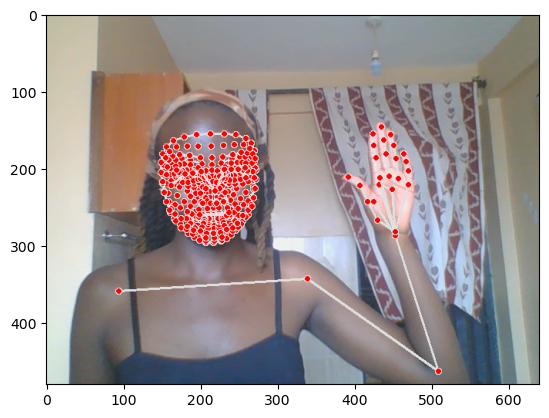

In [71]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))